# Objective


This notebook supports Northeastern University’s campaign to promote wellness and healthy lifestyles among students. For many first-time college students, managing nutrition, making health-conscious choices, and navigating exposure to alcohol and smoking can be challenging. Key factors like walking to class, drinking adequate water, exercising regularly, and choosing nutritious foods significantly impact overall wellness. Our objective is to analyze these lifestyle features and apply machine learning to categorize students based on their health-related behaviors. This model will provide insights to guide Northeastern’s wellness initiatives.

The notebook includes a comprehensive process: data overview, exploratory data analysis, data preparation, data partitioning, model building, performance evaluation, and model comparison. It compares logistic regression and decision tree models to identify the best approach for predicting wellness categories.

# Data Preparation



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import tree
import graphviz
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [ ]:
# Upload and read the file
file = files.upload()
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Display the first few rows of the DataFrame
df.head()

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic (1).csv


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Data Dictionary:

* Gender: Gender of the individual (e.g., Male, Female)
* Age: Age of the individual
* Height: Height of the individual (meters)
* Weight: Weight of the individual (kg)
* family_history_with_overweight: Whether the individual has a family history of being overweight (Yes/No)
* FAVC: Frequent consumption of high-calorie food (Yes/No)
* FCVC: Frequency of vegetable consumption (1-3 scale)
* NCP: Number of meals per day
* CAEC: Consumption of food between meals (Sometimes, Frequently, Always, etc.)
* SMOKE: Whether the individual smokes (Yes/No)
* CH2O: Daily water consumption (in liters)
* SCC: Monitoring calorie consumption (Yes/No)
* FAF: Physical activity frequency (number of days per week)
* TUE: Time spent using technology (hours per day)
* CALC: Alcohol consumption frequency (Sometimes, Frequently, Always, etc.)
* MTRANS: Mode of transportation (e.g., Walking, Public Transport)
* NObeyesdad: Obesity level (target variable)

### Information
The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

In [ ]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

*   17 columns
*   2111 instances (and no null values)
*   9 Object & 8 Float64




In [ ]:
#Checking summary statistics
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


* Age: ranges from 14 to 51 (skewed slighlty)
* Height: ranges from 1.45m (4.7ft) to 1.98m (6.5ft)
* Weight: ranges from 39kg (85lbs)to 173kg (381lbs)
* Frequency of veggie consuption: ranges from 1 to 3
* Number of meals: range from 1 to 4
* Daily water consumption:  ranges from 1l to 3l
* Physical activity: frequency ranges from 3 to 3 times a week
* Time spent using technology: ranges from 0 to 2

Based on these the physical acivtity and time spent using technology seem to be a little low especially based on our perspective of college students.

In [ ]:
# Statistical insights of catagorical columns
df.describe(include=object)

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


* Gender: The dataset has a nearly even distribution of gender
* Family History with Overweight: 1,726 have a family history of overweight
* Frequent Consumption of High-Caloric Food: High-caloric food occurs with 1,866 individuals
* Consumption of Food Between Meals: "Sometimes" is the most common response with 1,765 individuals
* Smoking: Smoking is rare
* Monitoring Caloric Consumption: Most individuals do not monitor their caloric intake.
* Consumption of Alcohol: "Sometimes" is the most frequent response with 1,401 indivdiausl
* Transportation: Public transportation is the most common mode of transport, with 1,580 individuals using it.
* Obesity Type: The most common obesity classification is "Obesity Type I," with 351 individuals falling into this category.

In [ ]:
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
#Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

Gender
Male      0.505921
Female    0.494079
Name: proportion, dtype: float64
****************************************
family_history_with_overweight
yes    0.817622
no     0.182378
Name: proportion, dtype: float64
****************************************
FAVC
yes    0.883941
no     0.116059
Name: proportion, dtype: float64
****************************************
CAEC
Sometimes     0.836097
Frequently    0.114638
Always        0.025107
no            0.024159
Name: proportion, dtype: float64
****************************************
SMOKE
no     0.979157
yes    0.020843
Name: proportion, dtype: float64
****************************************
SCC
no     0.954524
yes    0.045476
Name: proportion, dtype: float64
****************************************
CALC
Sometimes     0.663667
no            0.302700
Frequently    0.033160
Always        0.000474
Name: proportion, dtype: float64
****************************************
MTRANS
Public_Transportation    0.748460
Automobile               0.2

In [ ]:
#checking unique values in each column
df.nunique()

,0
Gender,2
Age,1402
Height,1574
Weight,1525
family_history_with_overweight,2
FAVC,2
FCVC,810
NCP,635
CAEC,4
SMOKE,2


FCVC (Frequency of Vegetable Consumption), NCP (Number of Meals Per Day), CH2O (Daily Water Consumption), FAF (Physical Activity Frequency), and TUE (Time Using Technology) should be rounded to the nearest whole number or binned to improve data consistency.

# Exploratory Data Analysis

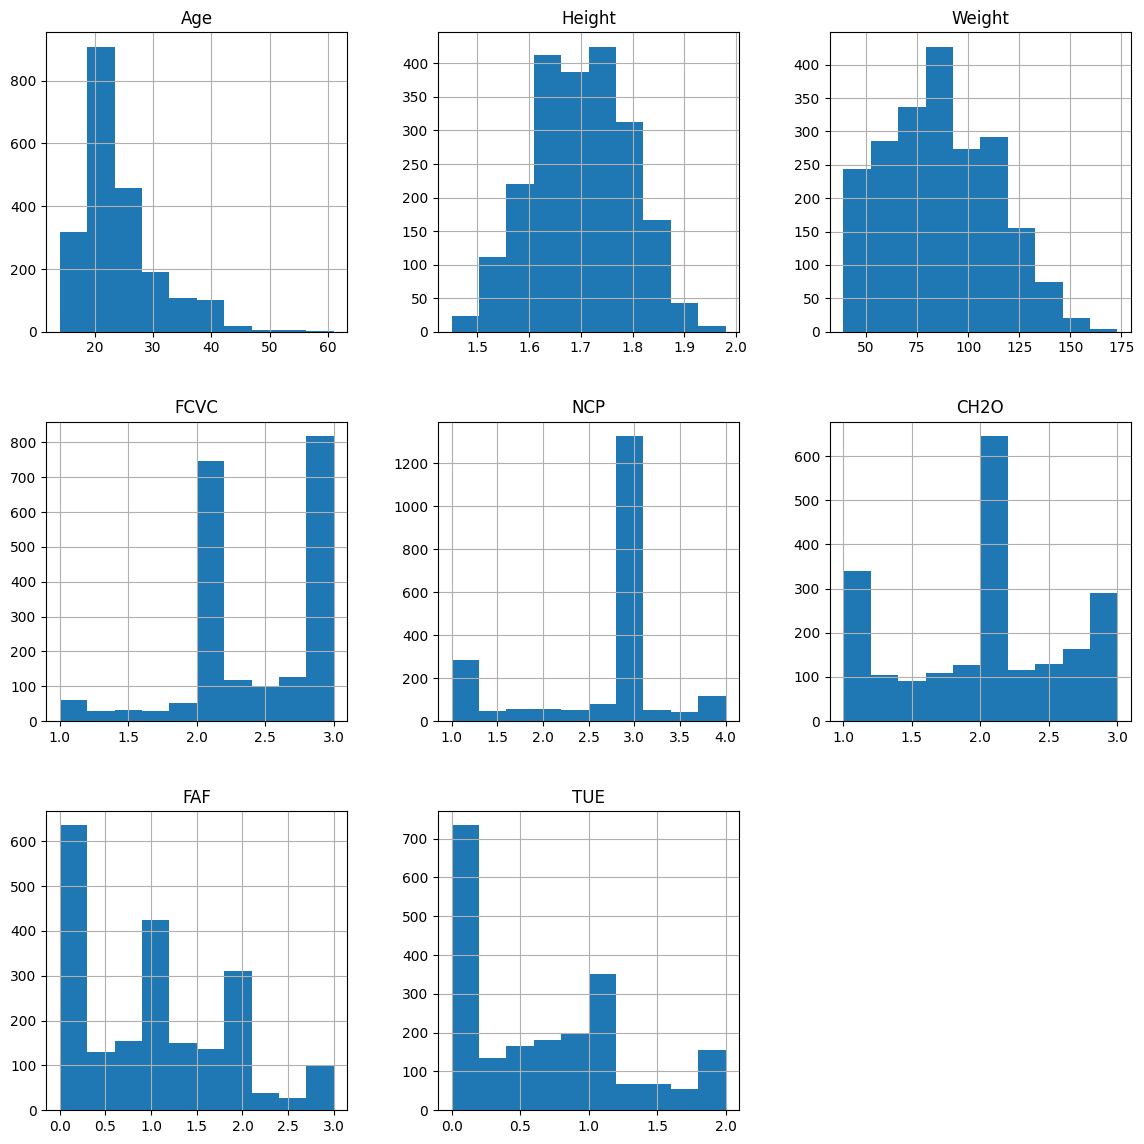

In [ ]:
#creating histograms
df.hist(figsize=(14,14))
plt.show()

*   AgeL Majority of people are between 20 and 30
*   Age, Weight are skewed right
*   NCP has a peak at 3 (majority people like eating 3 meals a day)


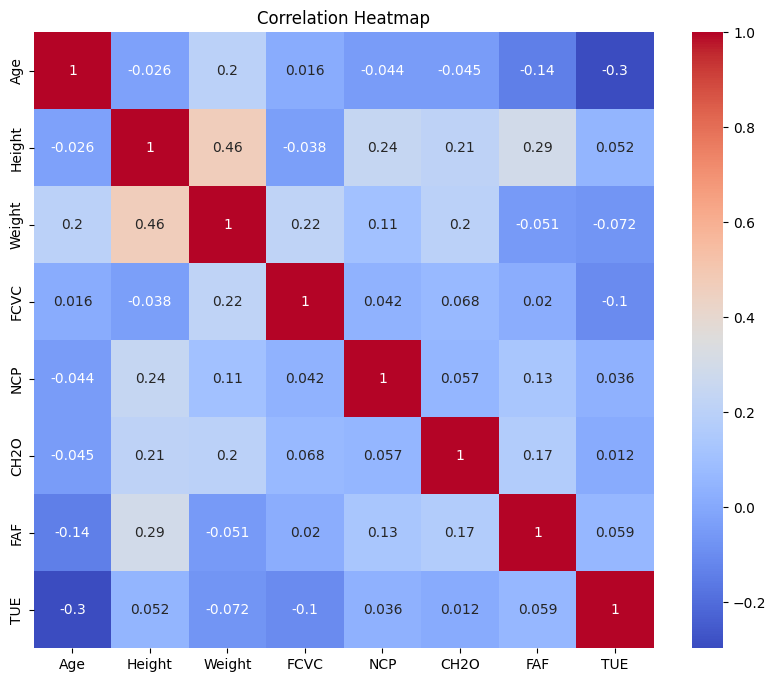

In [ ]:
# Correlation heatmap for numerical variables
numerical_data = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

* Weight and Height have a moderate positive correlation (0.46)
* Age and TUE (Time Using Electronics) show a slight negative correlation (-0.3), indicating that younger individuals might spend more time on electronic devices.
* FAF (Frequency of Physical Activity) has a weak positive correlation with Height (0.29), suggesting that taller individuals may engage in physical activity more frequently.

Overall, this heatmap indicates that most features are relatively independent, with only a few showing mild to moderate correlations. Therefore we will not omit any features since their is limited risk of milticollinearity.

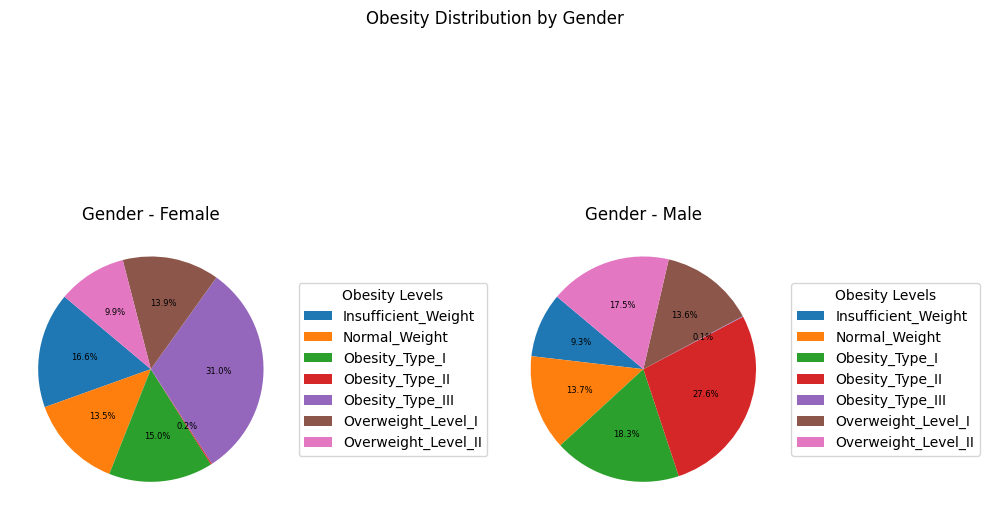

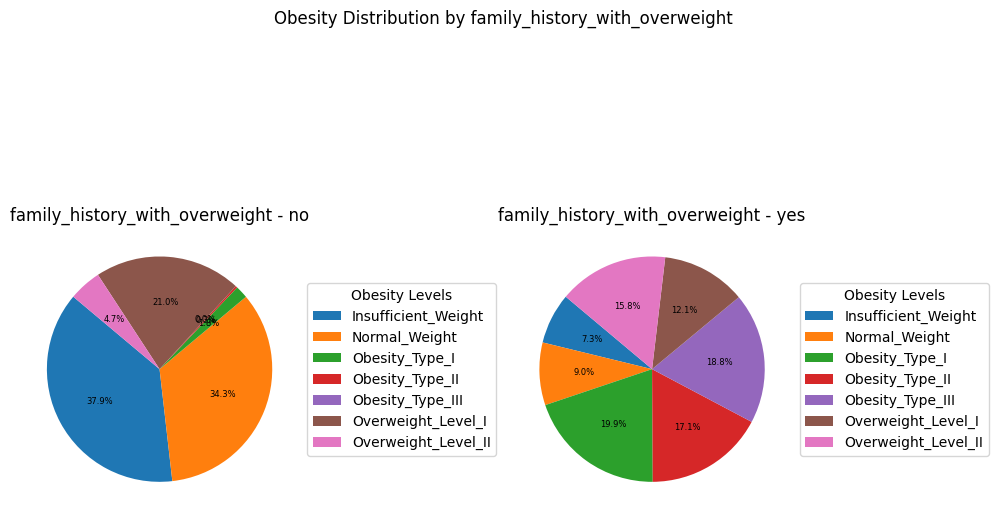

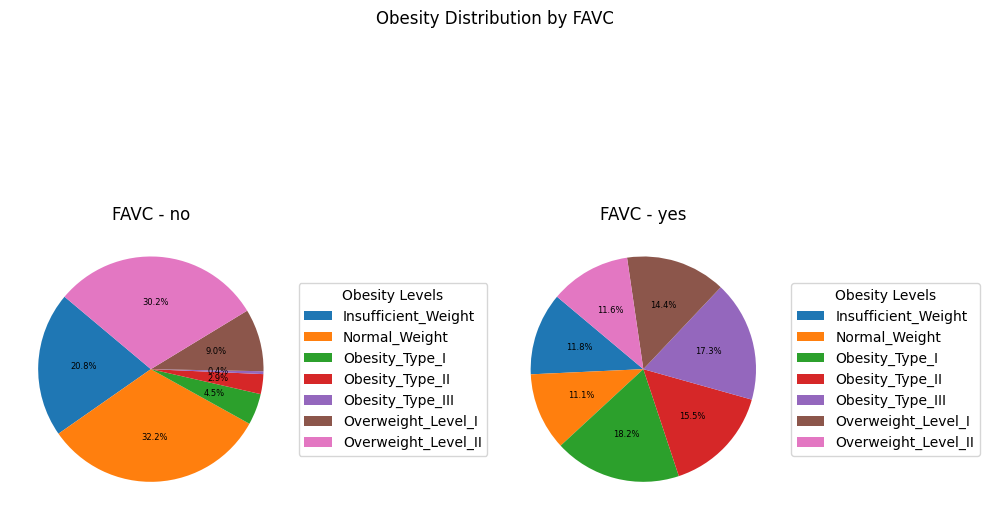

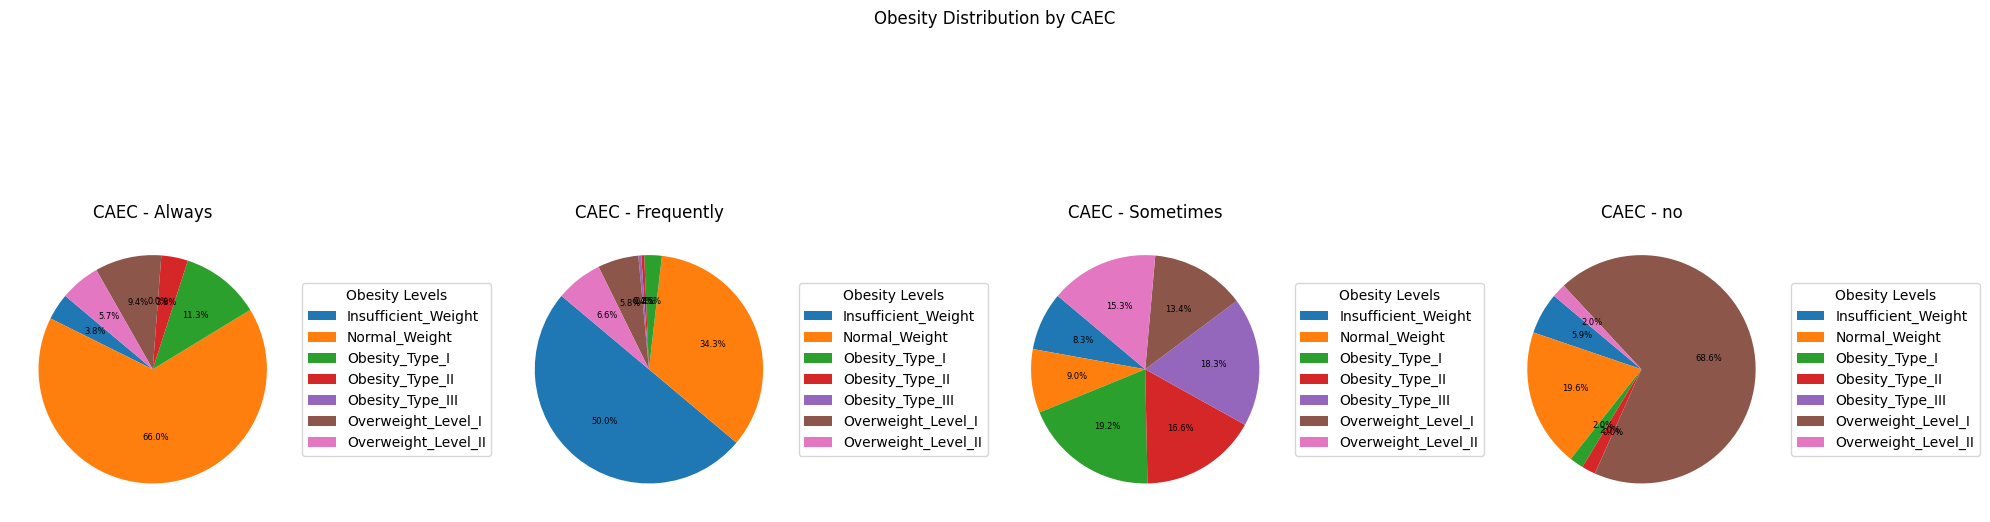

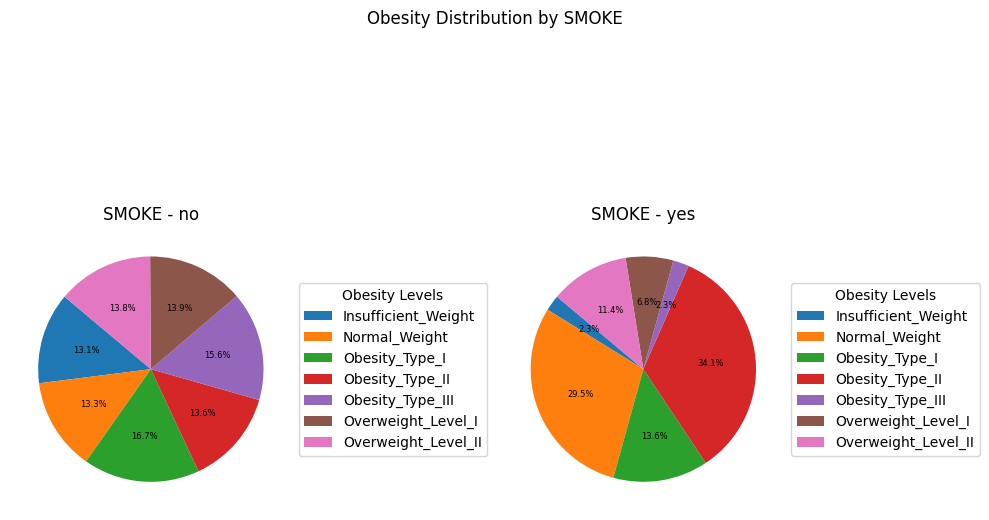

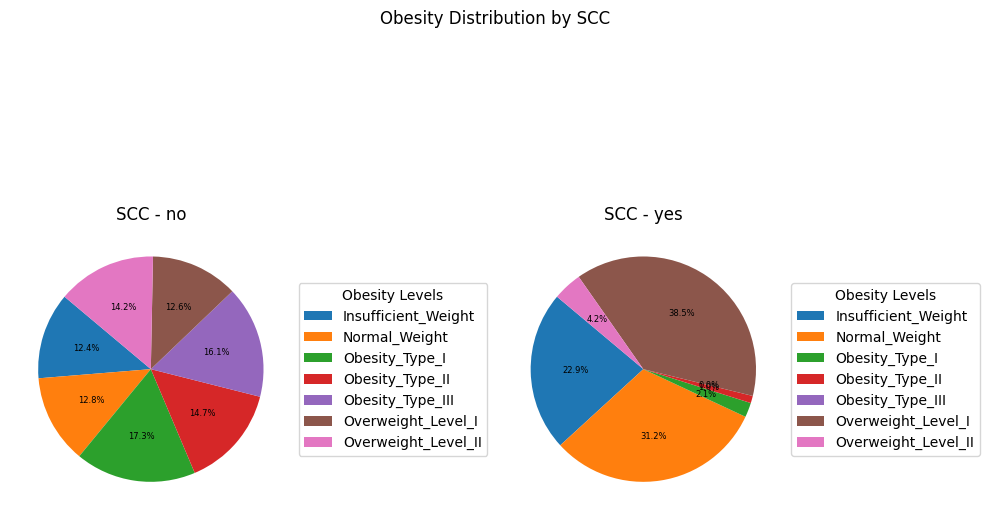

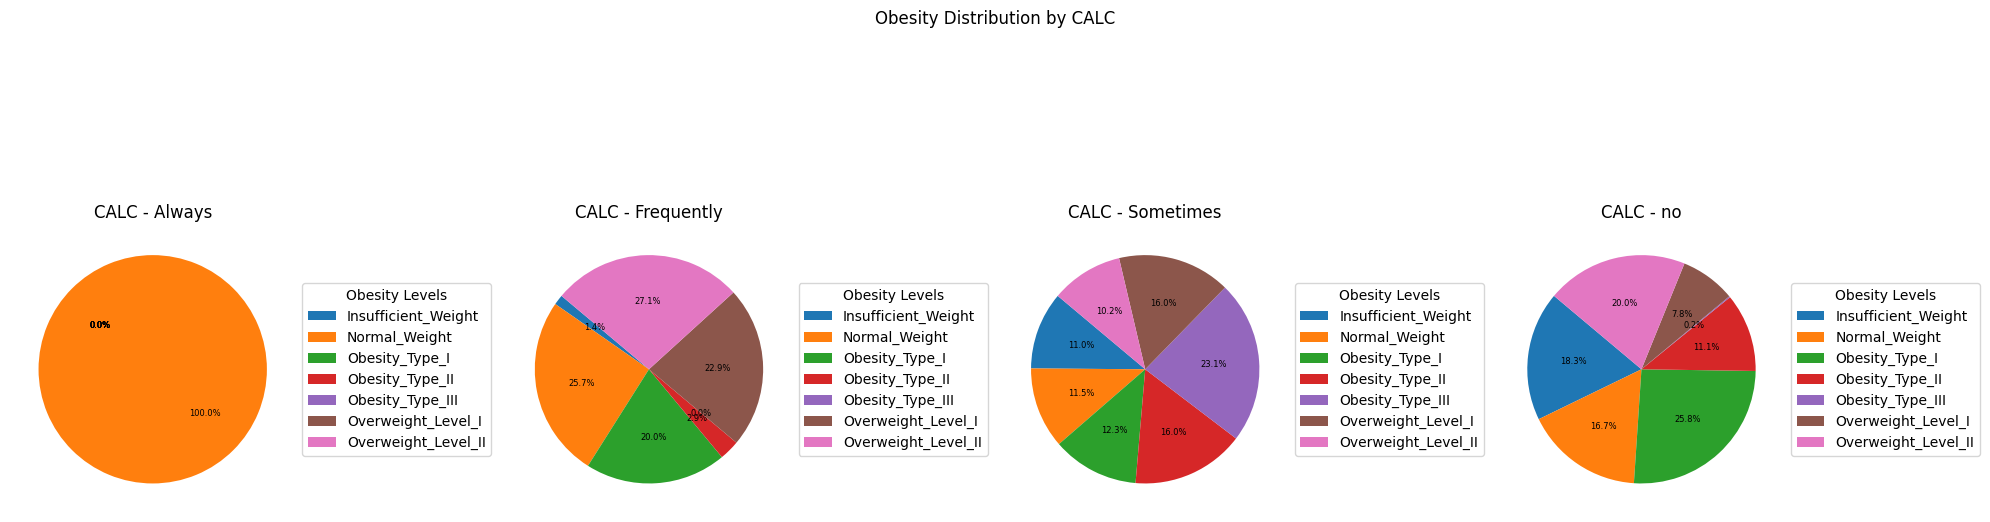

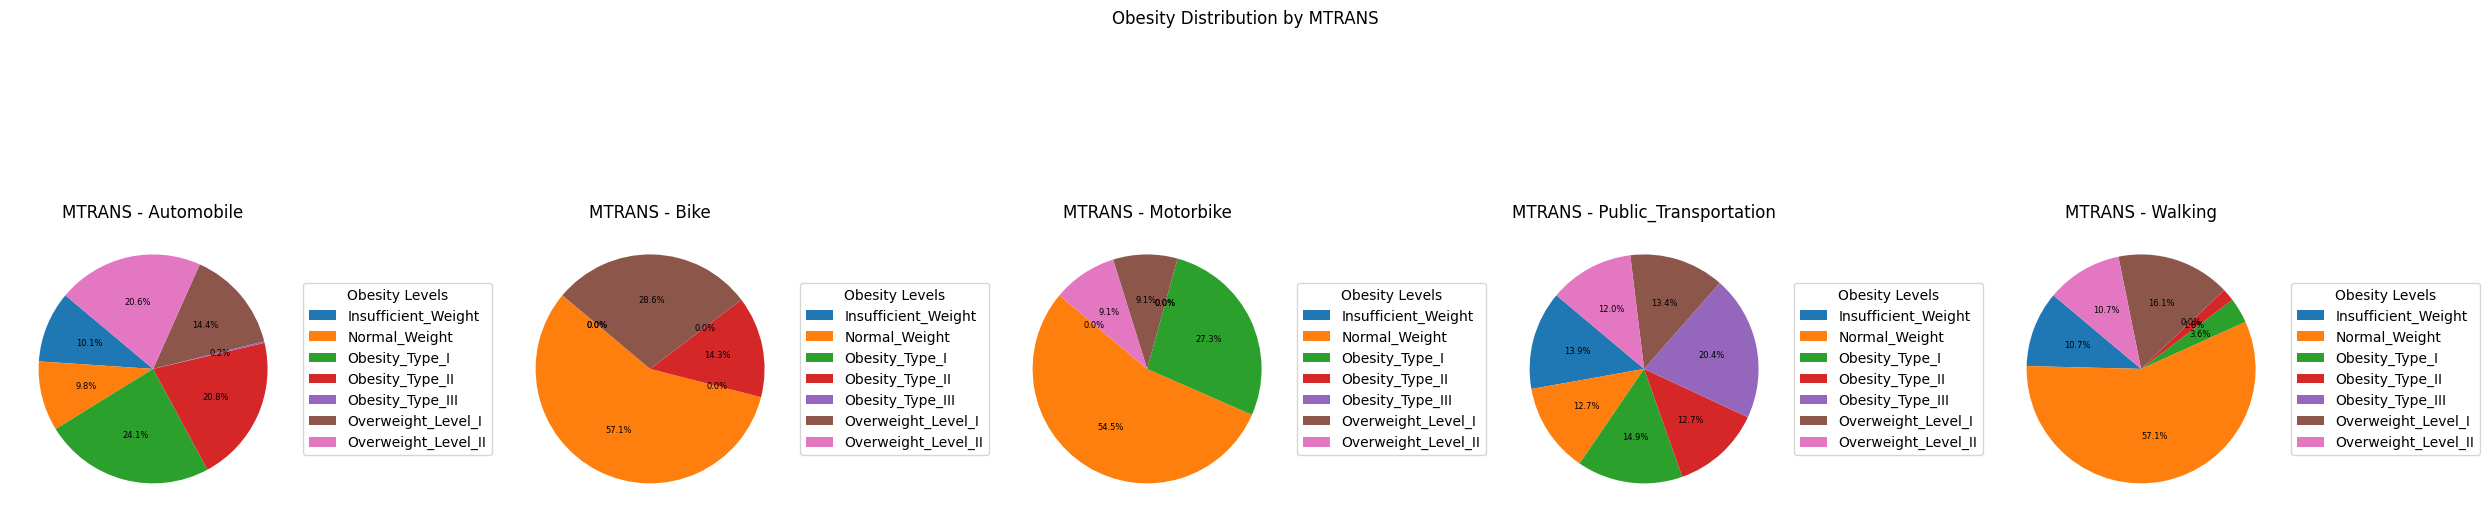

In [ ]:
#Creating categorical variables
cols= ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS','NObeyesdad']

# List of columns to generate pie charts for, excluding 'NObeyesdad' as it is our target variable
columns_to_analyze = [col for col in df[cols].columns if col != 'NObeyesdad']

# Loop through each column and generate pie charts for each category within 'NObeyesdad'
for column in columns_to_analyze:
    # Group by the current column and 'NObeyesdad' to get counts
    column_obesity_counts = df[cols].groupby([column, 'NObeyesdad']).size().unstack(fill_value=0)
    # Create a subplot for each category in the current column
    fig, axes = plt.subplots(1, len(column_obesity_counts.index), figsize=(5 * len(column_obesity_counts.index), 7), squeeze=False)

    for i, category in enumerate(column_obesity_counts.index):
        # Plot a pie chart for each category in the column
        wedges, texts, autotexts = axes[0, i].pie(
            column_obesity_counts.loc[category],
            autopct='%1.1f%%',
            startangle=140,
        )

        axes[0, i].set_title(f'{column} - {category}')
        for autotext in autotexts:
            autotext.set_fontsize(6)

      # Add a legend to the right side of each pie chart
        axes[0, i].legend(
            wedges,                  # Reference to pie chart sections
            column_obesity_counts.columns,  # Labels for each section
            title="Obesity Levels",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1)  # Position the legend to the right
        )
   # Adjust layout and show the plot
    plt.suptitle(f'Obesity Distribution by {column}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

* **Gender**: Differences in obesity levels exist between males and females.<br>
* **Family History**: A family history of being overweight correlates with higher obesity levels.<br>
* **FAVC**: Frequent high-calorie food intake strongly links to higher obesity.<br>
* **CAEC**: Regular snacking associates with increased obesity.<br>
* **SMOKE**: Smoking's impact on obesity is varied and subtle.<br>
* **SCC**: Monitoring calories correlates with healthier weight levels.<br>
* **CALC**: Frequent alcohol consumption links to higher obesity.<br>
* **MTRANS**: Active transport (e.g., walking) is associated with healthier weights.<br>
 **Overall**: Lifestyle choices (diet, activity, alcohol) and family history are significant predictors of obesity.

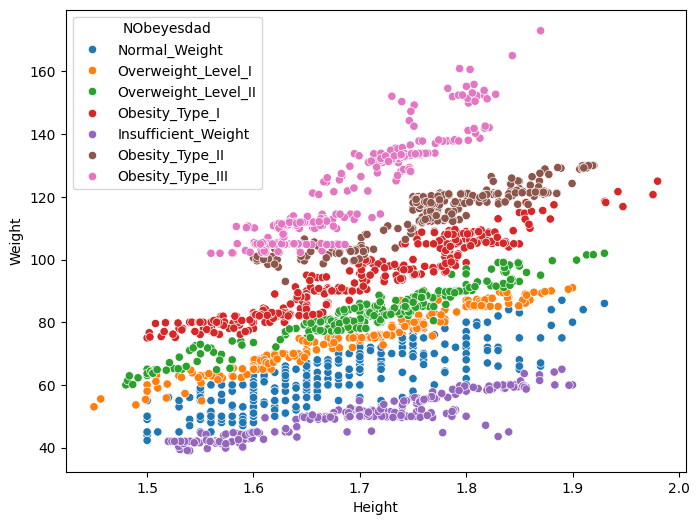

In [ ]:
#Variation of obesity according to Weight and Height
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Height', y='Weight', hue = 'NObeyesdad')
plt.show()

* Height and Weight have an effect on Obesity Type

# Data Preparation / Feature Engineering

In [ ]:
cont_columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]
# convert to int / nearest int value
for col in cont_columns:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int')

In [ ]:
# Check for missing values
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
# Check for duplicates values
df.duplicated().any()

True

In [ ]:
# Drpping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Encode Categorical variables
data_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
#Convert Ordinal Columns
ordinal_cols = ['CAEC', 'CALC']
for col in ordinal_cols:
    df[col] =df[col].map({'Sometimes': 1, 'Frequently': 2, 'Always': 3, 'no': 0})

In [ ]:
#Encode Target Variable
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

In [ ]:
# Creating dummy variables for the categorical columns
#drop_first=True is used to avoid redundant variables
df = pd.get_dummies(df, columns=df.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
df = df.astype(float)
df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,1.620000,64.000000,2.0,3.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.000000,1.520000,56.000000,3.0,3.0,1.0,3.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,23.000000,1.800000,77.000000,2.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.000000,1.800000,87.000000,3.0,3.0,1.0,2.0,2.0,0.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.000000,1.780000,89.800000,2.0,1.0,1.0,2.0,0.0,0.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.0,2.0,2.0,1.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2107,21.982942,1.748584,133.742943,3.0,3.0,1.0,2.0,1.0,1.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2108,22.524036,1.752206,133.689352,3.0,3.0,1.0,2.0,1.0,1.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2109,24.361936,1.739450,133.346641,3.0,3.0,1.0,3.0,1.0,1.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Data Partitioning

In [ ]:
#Define the features and Targets
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

In [ ]:
from sklearn.preprocessing import StandardScaler

#Scaling the data
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (1460, 19) (1460,)
Testing set: (627, 19) (627,)


# Model Building

In [ ]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',  'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II'], yticklabels=['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',  'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
lg = model.fit(X_train, y_train)

### Decision Tree Model

In [ ]:
model = DecisionTreeClassifier()
dt = model.fit(X_train, y_train)

# Performance Evaluation

### Logistic Regression Model

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       180
         1.0       0.86      0.70      0.77       187
         2.0       0.94      0.91      0.92       246
         3.0       0.93      0.98      0.96       202
         4.0       1.00      1.00      1.00       233
         5.0       0.77      0.82      0.80       196
         6.0       0.83      0.83      0.83       216

    accuracy                           0.89      1460
   macro avg       0.89      0.89      0.89      1460
weighted avg       0.89      0.89      0.89      1460



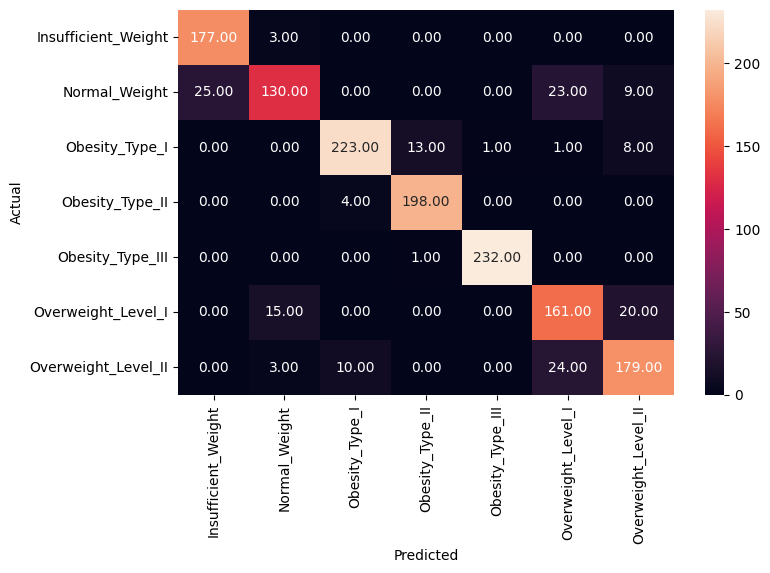

In [ ]:
#checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

* Class 0: High precision (0.88) and very high recall (0.98), resulting in an F1-score of 0.93, indicating the model performs extremely well in identifying instances of this class.

* Class 1: Precision is good (0.86), but recall is lower (0.70), leading to an F1-score of 0.77. This suggests the model occasionally misclassifies instances of this class.

* Class 2: Very high precision (0.94) and recall (0.91), yielding an F1-score of 0.92, which shows that the model reliably identifies this class with minimal misclassification.

* Class 3: Strong performance with high precision (0.93) and recall (0.98), resulting in an F1-score of 0.96, indicating accurate classification for this class.

* Class 4: Perfect precision (1.00) and recall (1.00), leading to an F1-score of 1.00. The model is highly effective in predicting this category with no misclassifications.

* Class 5: Good precision (0.77) and recall (0.82), with an F1-score of 0.80, showing that the model performs reasonably well for this class, though there is some room for improvement.

* Class 6: Strong precision (0.83) and recall (0.83), resulting in an F1-score of 0.83, indicating a balanced performance for this class.

Overall: The model achieves high accuracy (0.89) on the training data, with an average F1-score of 0.89 across all classes. It performs exceptionally well for Classes 0, 2, 3, and 4, with slightly lower performance in Classes 1 and 5. This strong training performance reflects a well-fitted model with a few areas for improvement in specific categories.

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91        87
         1.0       0.87      0.63      0.73        95
         2.0       0.93      0.87      0.90       105
         3.0       0.97      0.99      0.98        95
         4.0       0.98      1.00      0.99        91
         5.0       0.64      0.68      0.65        80
         6.0       0.67      0.81      0.73        74

    accuracy                           0.85       627
   macro avg       0.85      0.85      0.84       627
weighted avg       0.86      0.85      0.85       627



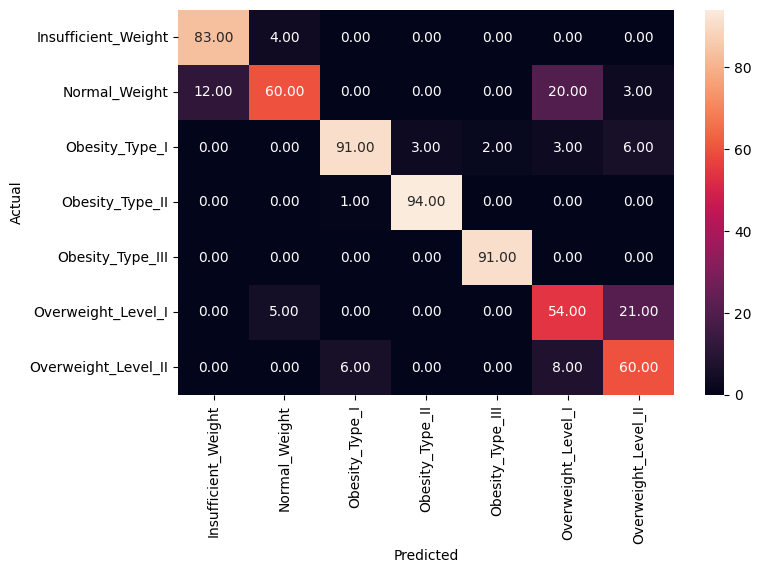

In [ ]:
#checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
LogisticRegressionScore =accuracy_score(y_test,y_pred_test)
metrics_score(y_test, y_pred_test)

* Class 0: High precision (0.87) and recall (0.95) result in a strong F1-score (0.91), indicating the model performs very well in correctly identifying instances of this class.

* Class 1: Precision is strong (0.87), but lower recall (0.63) reduces the F1-score to 0.73, suggesting the model struggles to capture all instances of this class, with some being misclassified.

* Class 2: Both precision (0.93) and recall (0.87) are high, leading to an F1-score of 0.90. This shows that the model reliably identifies this class with minimal misclassification.

* Class 3: Excellent performance with high precision (0.97), recall (0.99), and F1-score (0.98), indicating very accurate identification of this class.

* Class 4: Outstanding performance, with near-perfect precision (0.98) and recall (1.00), resulting in an F1-score of 0.99. The model is highly effective in classifying this category correctly.

* Class 5: Lower precision (0.64) and recall (0.68) lead to an F1-score of 0.65, suggesting that the model has difficulty accurately predicting this class, with a higher rate of misclassifications.

* Class 6: Moderate precision (0.67) and higher recall (0.81) result in an F1-score of 0.73, indicating that while the model captures most instances of this class, it has some misclassification issues.

Overall: The model achieves a balanced performance with an overall accuracy of 0.85. High-performing classes (0, 2, 3, and 4) show strong, reliable predictions, while Classes 5 and 6 have room for improvement.

In [ ]:
# Define the target obesity category names
target_names = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
                'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

# Create and display the DataFrame with coefficients, setting target names as column headers
pd.DataFrame(lg.coef_, columns=X.columns, index=target_names).T.sort_values(by='Obesity_Type_III', ascending=False)

,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Weight,-11.158957,-6.283290,4.310116,8.872693,7.342089,-2.746405,-0.336246
FCVC,0.108355,-0.251114,-0.489973,-0.217877,1.467257,-0.373335,-0.243313
NCP,-0.049033,-0.132080,-0.340058,-0.147464,1.025320,-0.055239,-0.301445
family_history_with_overweight_yes,-0.530057,-0.465896,0.225055,0.074220,0.860473,-0.382094,0.218299
CALC,-0.158852,-0.119775,-0.193405,-0.317404,0.766906,0.269299,-0.246769
MTRANS_Public_Transportation,-0.200386,-0.124611,-0.274926,0.342917,0.510016,-0.257480,0.004470
FAVC_yes,-0.169249,-0.211777,0.535561,-0.395574,0.379265,0.267454,-0.405680
CAEC,0.237601,0.397113,-0.140824,-0.307008,0.246612,-0.276186,-0.157308
CH2O,0.048152,-0.026635,0.189308,-0.472328,0.238529,-0.013279,0.036254
TUE,-0.006980,-0.141505,0.102654,-0.186613,0.176285,-0.157083,0.213243


* Class 0: Higher height and lower weight are associated with an increased likelihood of being in this category, while factors like age and family history have a slight negative influence.

* Class 1: Taller individuals and those with lower weight are more likely in this category; being male also slightly increases the likelihood.

* Class 2: Frequent high-calorie food consumption and higher weight are strong predictors of belonging to this category.

* Class 3: Older age, male gender, and higher weight greatly increase the likelihood of falling into this category, while high vegetable intake has a slight negative effect.

* Class 4: Family history of overweight, higher weight, and vegetable consumption are key indicators, while being male decreases the likelihood.

* Class 5: Individuals who monitor calories and consume alcohol have a slightly increased likelihood in this category, with weight having a moderate effect.

* Class 6: Increased use of technology, family history, and higher vegetable intake are associated with this category, though weight has less influence here than in other classes.


### Decision Tree Model

In [ ]:
pred = dt.predict (X_test)
DecisionTreeScore=accuracy_score(y_test, pred)
DecisionTreeScore

0.9362041467304625

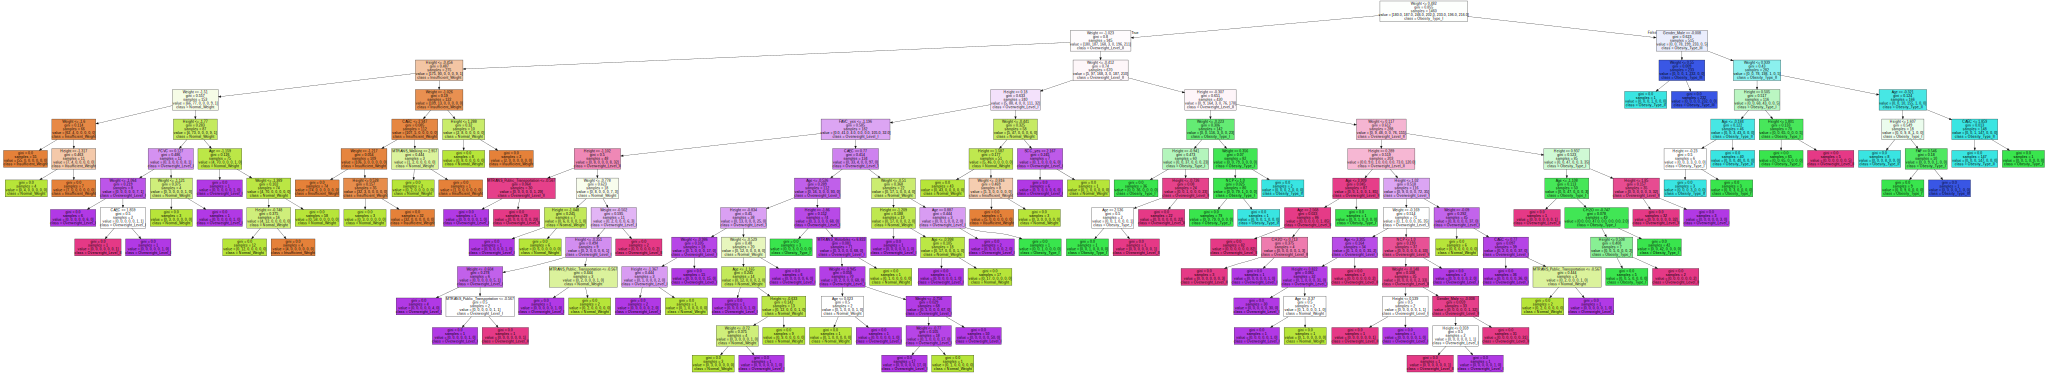

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None, filled = True, feature_names=X_train.columns, class_names=['Insufficient_Weight',  'Normal_Weight', 'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'])
graph = graphviz.Source(dot_data)
graph

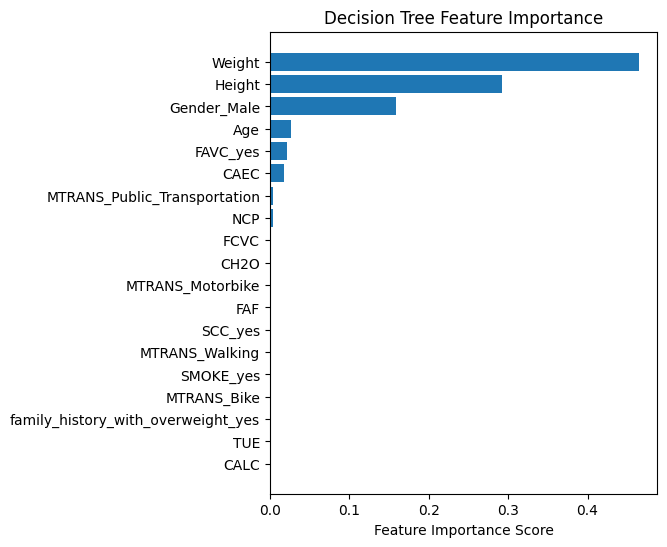

In [ ]:
# Get feature importance values
feature_importance = dt.feature_importances_

# Create a DataFrame to match features with their importance scores
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(5, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance Score")
plt.title("Decision Tree Feature Importance")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

* Height and Weight are large indicators
* Age also is a top feature for obesity predictions
* FAVC and CAEC which involved food consuption are a relatively high impact

<Axes: xlabel='depth', ylabel='Accuracy'>

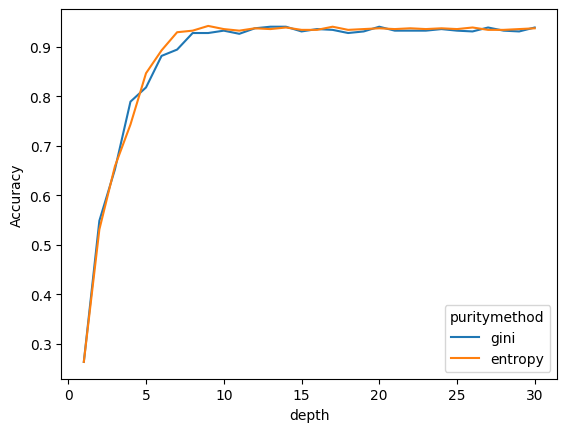

In [ ]:
ind = 1
crit = ['gini', 'entropy']
df_results = pd.DataFrame(columns = ['depth', 'puritymethod', 'Accuracy'])

for i in np.arange(1, 31):
  for j in crit:
    model = DecisionTreeClassifier(max_depth=i, criterion=j)
    model.fit(X_train, y_train)
    pred = model.predict (X_test)
    df_results.loc[ind] = [i, j, accuracy_score(y_test, pred)]
    ind+=1
sns.lineplot(x = 'depth', y = 'Accuracy', hue='puritymethod', data = df_results)

A depth around 8 might be an optimal choice, as it maximizes accuracy without adding unnecessary complexity.

In [ ]:
df_results

,depth,puritymethod,Accuracy
1,1,gini,0.263158
2,1,entropy,0.263158
3,2,gini,0.548644
4,2,entropy,0.531100
5,3,gini,0.652313
6,3,entropy,0.658692
7,4,gini,0.789474
8,4,entropy,0.743222
9,5,gini,0.818182
10,5,entropy,0.846890


Cost Complexity prunning

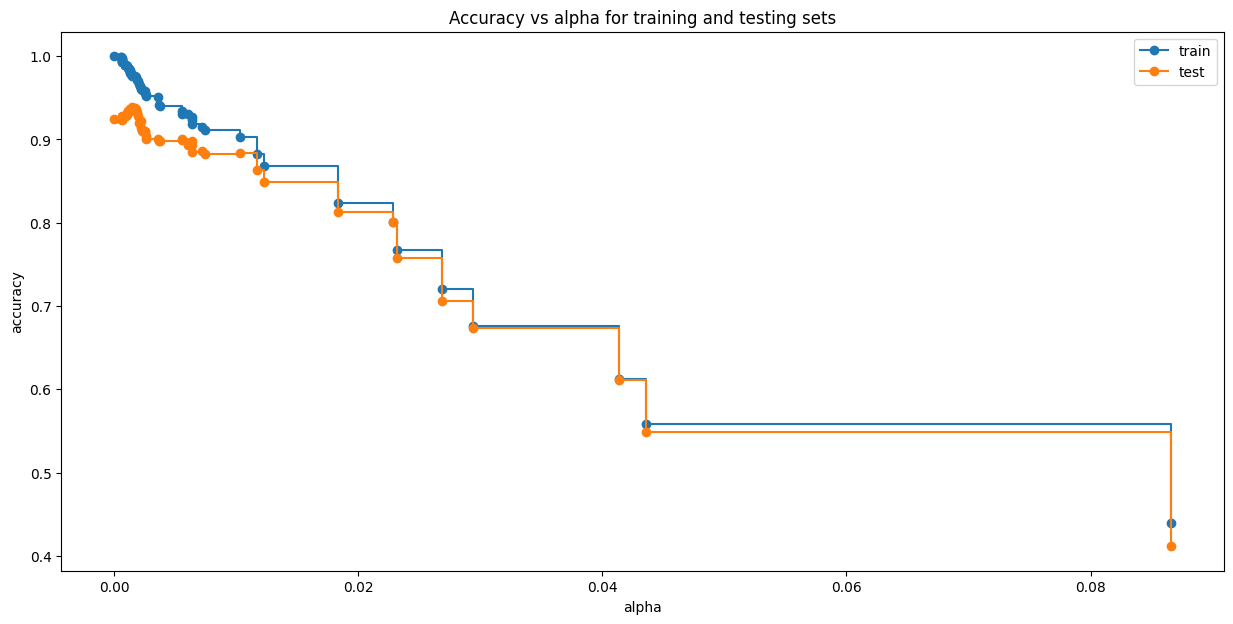

In [ ]:
# Train the initial decision tree model
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train decision trees with different alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

#Plot Nodes/Depth vs Alpha
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

#Plot Alpha vs Accuracy
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

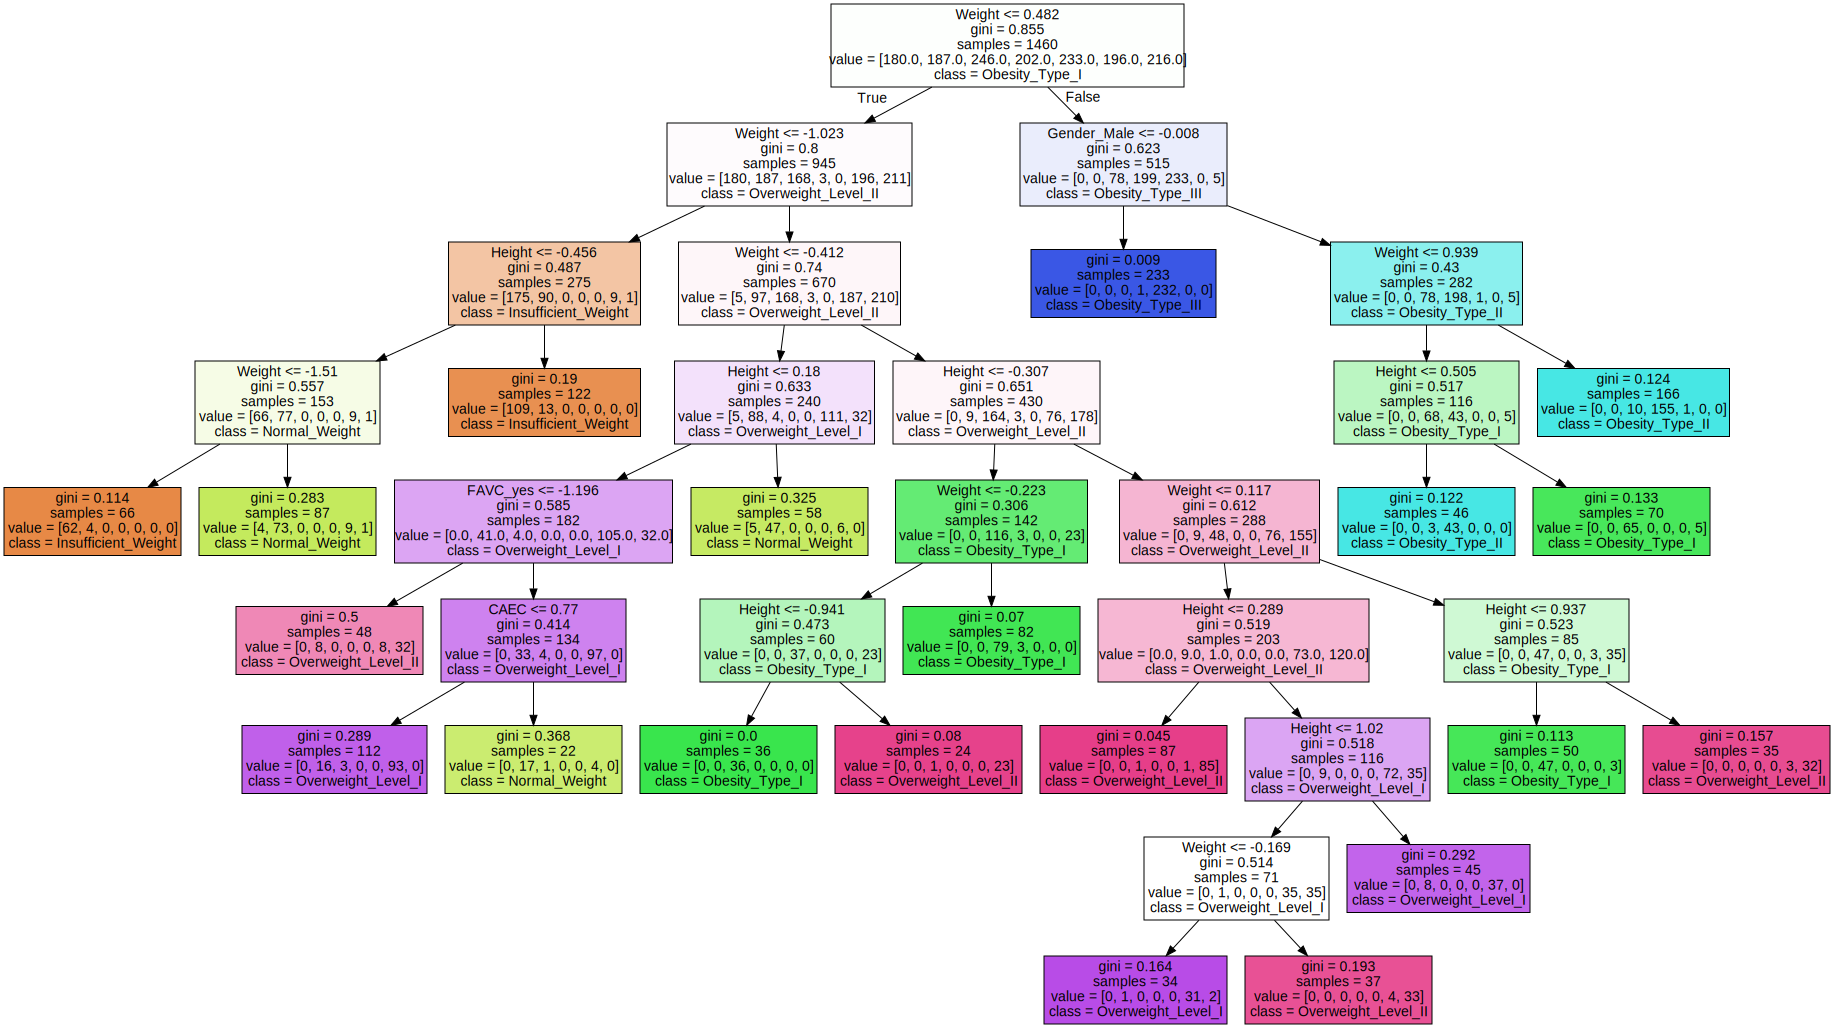

In [ ]:
# Train the pruned model with ccp_alpha = 0.2
pruned_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
pruned_clf.fit(X_train, y_train)

# Export the decision tree visualization
dot_data = tree.export_graphviz(pruned_clf, out_file=None,filled=True, feature_names=X_train.columns,class_names=['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II'])

# Render the tree graph
graph = graphviz.Source(dot_data)
graph


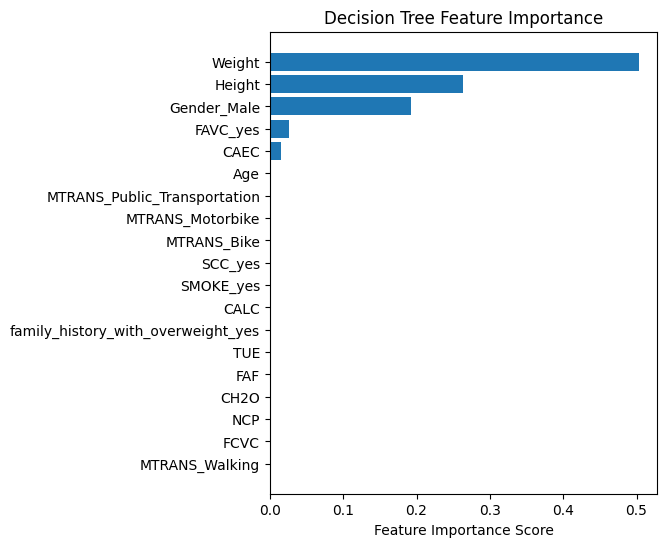

In [ ]:
# Get feature importance values
feature_importance = pruned_clf.feature_importances_

# Create a DataFrame to match features with their importance scores
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(5, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance Score")
plt.title("Decision Tree Feature Importance")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

* Height and Weight are large indicators
* Age is not a top feaature anymore
* FAVC and CAEC which involved food consuption are a relatively high impact

# Model Comparison & Selection

In [ ]:
report_lr = classification_report(y_test, lg.predict(X_test),output_dict=True)
report_df_lr = pd.DataFrame(report_lr).transpose()
report_df_lr

,precision,recall,f1-score,support
0.0,0.873684,0.954023,0.912088,87.00000
1.0,0.869565,0.631579,0.731707,95.00000
2.0,0.928571,0.866667,0.896552,105.00000
3.0,0.969072,0.989474,0.979167,95.00000
4.0,0.978495,1.000000,0.989130,91.00000
5.0,0.635294,0.675000,0.654545,80.00000
6.0,0.666667,0.810811,0.731707,74.00000
accuracy,0.850080,0.850080,0.850080,0.85008
macro avg,0.845907,0.846793,0.842128,627.00000
weighted avg,0.857067,0.850080,0.849352,627.00000


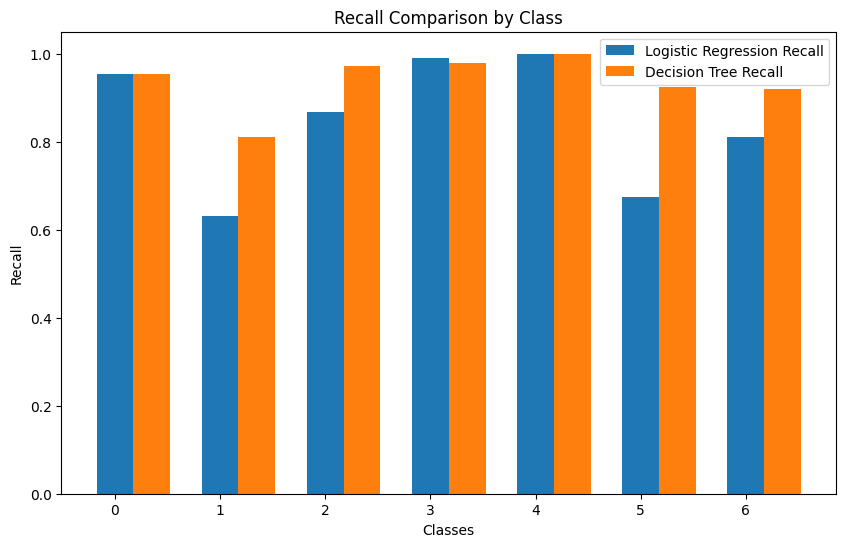

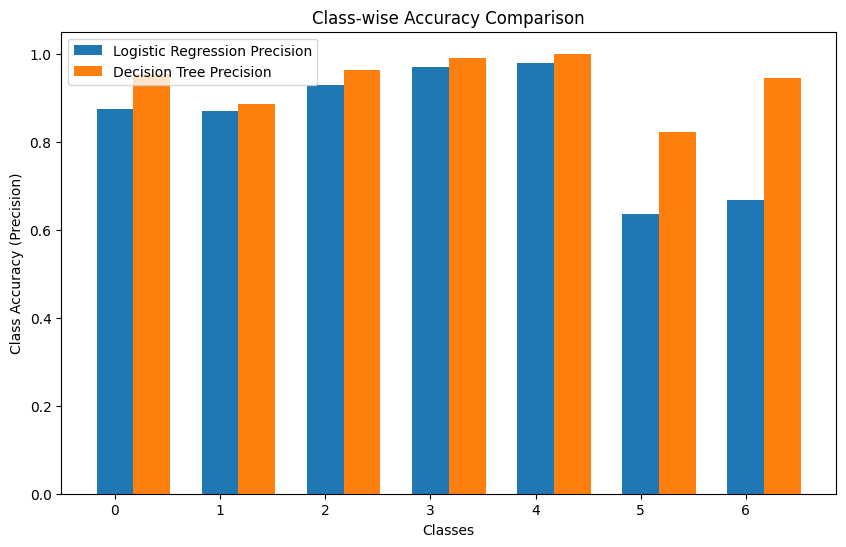

In [ ]:
report_lr = classification_report(y_test, lg.predict(X_test), output_dict=True)
report_dt = classification_report(y_test, model.predict(X_test), output_dict=True)

# Convert reports into DataFrames for easier plotting
report_df_lr = pd.DataFrame(report_lr).transpose()
report_df_dt = pd.DataFrame(report_dt).transpose()

# Define classes (excluding the overall metrics like 'accuracy', 'macro avg', etc.)
classes = report_df_lr.index[:-3]

# Plotting Recall Comparison
plt.figure(figsize=(10, 6))
# Logistic Regression recall
recall_lr = [report_df_lr.loc[cls, 'recall'] for cls in classes]
# Decision Tree recall
recall_dt = [report_df_dt.loc[cls, 'recall'] for cls in classes]

bar_width = 0.35
index = np.arange(len(classes))

plt.bar(index, recall_lr, bar_width, label='Logistic Regression Recall')
plt.bar(index + bar_width, recall_dt, bar_width, label='Decision Tree Recall')
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall Comparison by Class')
plt.legend()
plt.show()

# Plotting Class Accuracy (Precision) Comparison
plt.figure(figsize=(10, 6))
# Logistic Regression precision (interpreted as class-wise accuracy)
accuracy_lr = [report_df_lr.loc[cls, 'precision'] for cls in classes]
# Decision Tree precision
accuracy_dt = [report_df_dt.loc[cls, 'precision'] for cls in classes]

plt.bar(index, accuracy_lr, bar_width, label='Logistic Regression Precision')
plt.bar(index + bar_width, accuracy_dt, bar_width, label='Decision Tree Precision')
plt.xlabel('Classes')
plt.ylabel('Class Accuracy (Precision)')
plt.title('Class-wise Accuracy Comparison')
plt.legend()
plt.show()

The Decision Tree model demonstrates better performance overall in both recall and precision across most classes compared to Logistic Regression. This indicates that the Decision Tree model is likely more effective for this classification task, particularly if a high recall and precision are desired for various classes.






